# Homework 2

## FINM 36700 - 2023

### UChicago Financial Mathematics

* Tobias Rodriguez del Pozo
* tobiasdelpozo@uchicago.edu

## ProShares ETF

### Case: *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term. 

<font color='red'>
These two types are in Figure 1 of the case.

1. Investing in non-traditional/alternative assets like real estate, commodities, currencies, etc. 
2. Alternative strategies like "geared" (leveraged) investing, long/short strategies, etc.

</font>

## 2. Hedge Funds.

#### a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

<font color='red'>

1. Quoting from the case: "Hedge funds had delivered about 10% higher returns than stocks and more than twice of much as bonds".

2. And: "hedge fund investment returns also had better properties in terms of downside protection".

</font>

#### b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

<font color='red'>

Again, there are **many** right answers here as given by the case.

1. "Most hedge funds had substantial minimum investments, so they were accesible to large institutions and wealthy accredited investors only".

2. "There were high hedge fund fees, typically an annual fee in the neighborhood of 2\% of assets, plus a performance fee of 20\% of gains for the year".

## 3. The Benchmarks

#### a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

<font color='red'>

HFRI - Hedge fund Index Series. Index of surveyed hedge funds (2000 Holdings) designed to track the performance of the hedge market as a whole. Monthly returns based on surveys. This can't be launched as an ETF as they need a third party index as benchmark.

MLFM - Index Series created by Merrill Lynch, to replicate the performance of HFRI. Its a linear factor decomposition of the HFRI returns into 6 assets. This is not an asset and not an ETF.

MLFM-ES - MLFM exchange serires, similar to MLFM, but a benchmark to HDG and thus it contains liquid investable assets. It also makes one change in the factors, substituting 6- month Eurodollar deposit yields with US Treasury Bills.

HDG - Actual tradaeble asset trying to track the MLFM-ES, by actually trading on these assets. HDG do not strictly adhere to MLFM-ES replication and would deviate from positions if they can get additional returns or reduce transaction cost.

</font>

#### b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

<font color='red'>
From the case: they had a 90\% correlation through 2013.

</font>

#### c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

<font color='red'>
The larget loading by far was T-Bills (short term treasury bills).

</font>

#### d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?


<font color='red'>

1. High correlation between the input factors, meaning that if we are trying to fit a linear model we will have multicollinearity problems.

2. It's a lagging indicator, so perhaps it doesn't replicate well out of sample or if the market changes.

</font>

## 4. The HDG Product

#### a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

<font color='red'>


HDG tracks MLFM-ES Index benchmark. The tracking error is low.

HDG tracks a modified version of the ML Factor Model, MLFM-ES. The Merrill Lynch Factor Model involves indexes which cannot be exactly traded. For that reason, ProShares created a traded version of the Factor Model which replaces non-traded indexes with liquid, traded securities.

Exhibit 1, slide 22 shows that this modified benchmark tracks the standard ML Factor Model with a correlation of 99.7% when looking at daily data from 2011-2013.

Exhibit 2 shows that HDG tracks this benchmark closely, though it does not report a numerical estimate.



</font>

#### b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

<font color='red'>

HDG may be valuable by delivering complicated or expensive beta to investors. In that sense, a sophisticated "beta" could be valued as "alpha" by investors, especially if delivered in a low-cost ETF.

And even if HDG is delivering only accessible beta, it could be valuable to a portfolio through its ability to diversify against traditional equity and bond allocations, as shown in Exhibit 1 and discussed as a benefit of HFRI. And at ETF fees, this could be an efficient way of loading into these alternative exposures.


</font>

#### c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

<font color='red'>

The gross returns of the underlying assets have a Sharpe Ratio of 0.50. Net of the 1% fee, the net SR for the ETF would then be 9/20 = 0.45. Net of fees, the hedge-fund has 6% excess returns, which leads to a Sharpe Ratio of 6/20 = 0.30.

Of course, this calculation is very simple, but it intends to illustrate that performance is sensitive to the high fees traditionally charged by hedge funds. In the numerical example above, the ETF delivers 90% of the asset-level Sharpe Ratio, while the Hedge Fund delivers 60% of the underlying asset Sharpe Ratio. Thus, though the ETF may miss some of the individual hedge-fund premia, it also has a lower hurdle rate given the lower fees.


</font>

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Aug 2023`.

In [1]:
from functools import partial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys

sys.path.append('../cmds/')

from TA_utils import *

plt.style.use("ggplot")
pd.options.display.float_format = "{:.4f}".format
p = plt.rcParams


read_excel = partial(pd.read_excel, index_col=0, parse_dates=[0])

hf_series = read_excel('../data/proshares_analysis_data.xlsx', sheet_name='hedge_fund_series')
mer_factors = read_excel('../data/proshares_analysis_data.xlsx', sheet_name='merrill_factors')

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [2]:
# Calculate performance metrics
calc_return_metrics(hf_series, as_df=True, adj=12)

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio
HFRIFWI Index,0.0432,0.0602,0.7177,0.8566
MLEIFCTR Index,0.0319,0.0570,0.5597,0.7349
MLEIFCTX Index,0.0304,0.0568,0.5351,0.7060
HDG US Equity,0.0205,0.0594,0.3455,0.4551
QAI US Equity,0.0196,0.0501,0.3917,0.5422


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [3]:
calc_risk_metrics(hf_series, as_df=True, var=0.05)

,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days)
HFRIFWI Index,-0.9832,5.9183,-0.0251,-0.0375,-0.0908,0.0586,-0.1155,2020-03-31,2021-10-31,2020-08-31 00:00:00,153
MLEIFCTR Index,-0.2558,1.6643,-0.0287,-0.0359,-0.0532,0.0589,-0.1243,2022-09-30,2021-06-30,-,-
MLEIFCTX Index,-0.2418,1.6316,-0.0289,-0.0358,-0.0524,0.0588,-0.1244,2022-09-30,2021-06-30,-,-
HDG US Equity,-0.2440,1.7801,-0.0312,-0.0376,-0.0592,0.0583,-0.1407,2022-09-30,2021-06-30,-,-
QAI US Equity,-0.4584,1.7376,-0.0201,-0.0327,-0.0563,0.0398,-0.1377,2022-09-30,2021-06-30,-,-


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [4]:
spy = mer_factors[["SPY US Equity"]]

calc_iterative_regression(hf_series, spy, one_to_many=True, adj=12)

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
HFRIFWI Index,-0.0032,0.3487,0.2917,0.7140,0.1240,-0.1005,0.0027
MLEIFCTR Index,-0.0147,0.3496,0.2903,0.8023,0.0912,-0.5803,0.0021
MLEIFCTX Index,-0.0160,0.3483,0.2884,0.8008,0.0873,-0.6316,0.0021
HDG US Equity,-0.0274,0.3594,0.2816,0.7805,0.0571,-0.9839,0.0023
QAI US Equity,-0.0198,0.2961,0.2170,0.7449,0.0662,-0.7844,0.0021


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI

<font color='red'>

* The alphas are all negative! SPY has been a rocket during this time.
* Hedge-funds (as measured by these broad indexes) have underperformed.
* Given that they have some SPY beta, their total return is positive (Sharpe is positive) but when we strip this factor out, the hedged performance has a negative Sharpe ratio as seen by the Info Ratio (which is the Sharpe Ratio of the hedged position.).

</font>

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

<font color='red'>

A good blog post on choosing the right color heat map:

https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/12/subtleties-of-color-part-3-of-6/

Note that correlation is a divergent scale (from -1 to 1), centered at 0, and the signs are important. So a divergent scale is appropriate.

</font>

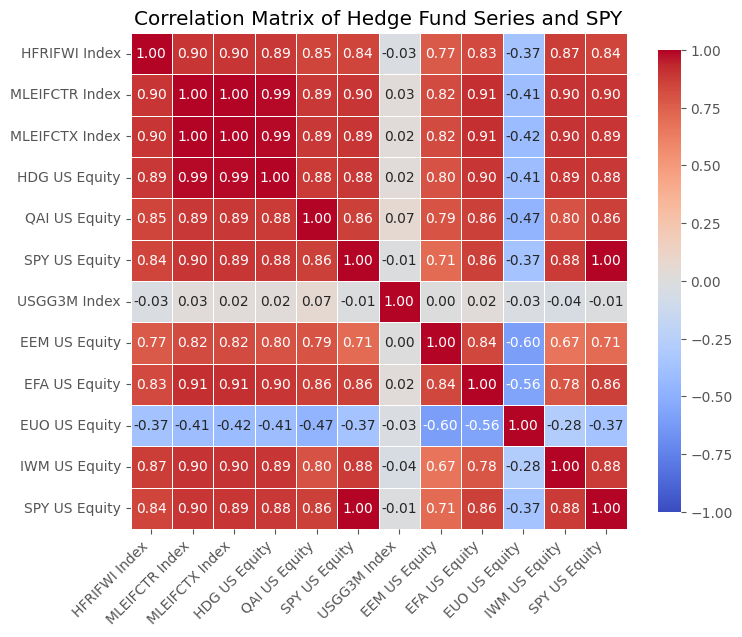

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = plot_correlation_matrix(pd.concat([hf_series, mer_factors, spy], axis=1).corr(), ax=ax)
ax.set_title("Correlation Matrix of Hedge Fund Series and SPY");

In [6]:
print_max_min_correlation(pd.concat([hf_series, mer_factors, spy], axis=1).corr())

Max Corr (by absolute value): MLEIFCTR Index and MLEIFCTX Index with a correlation of 1.00
Min Corr (by absolute value): USGG3M Index and EEM US Equity with a correlation of 0.00
Min Corr (raw): EEM US Equity and EUO US Equity with a correlation of -0.60


## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

#### a. Report the intercept and betas.
#### b. Are the betas realistic position sizes, or do they require huge long-short positions?
#### c. Report the R-squared.
#### d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [7]:
with_int = calc_multivariate_regression(hf_series['HFRIFWI Index'], mer_factors).T
no_int = calc_multivariate_regression(hf_series['HFRIFWI Index'], mer_factors, intercept=False).T
regrs = pd.concat([with_int, no_int], axis=1)
regrs.columns = ["HFRI w/Intercept", "HFRI w/o Intercept"]
regrs

,HFRI w/Intercept,HFRI w/o Intercept
Alpha,0.0166,0.0000
R-Squared,0.8369,0.8399
SPY US Equity Beta,0.0333,0.0509
USGG3M Index Beta,-0.1659,0.3378
EEM US Equity Beta,0.0779,0.0776
EFA US Equity Beta,0.0824,0.0753
EUO US Equity Beta,0.0226,0.0256
IWM US Equity Beta,0.1521,0.1486
Information Ratio,0.6822,0.0000
Tracking Error,0.0020,0.0244


<font color='red'>

b. The beta sizes are all very realistic, with none of the betas being above 1. We also don't have extreme long/short positions, which is good. However, we could make an argument that because all the factors are so correlated, we actually aren't getting a good estimate of beta and could perhaps achieve better out of sample replication by using fewer factors.

</font>

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

OOS-R-Squared: 80.80%


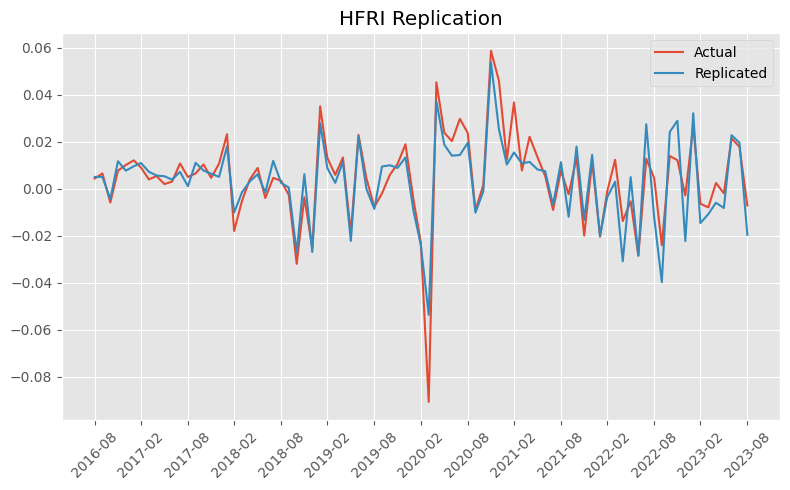

In [8]:
# Here, we use a new Python concept, called a defaultdict. This is a dictionary that
# automatically creates a new key if it doesn't exist. We can pass it a type in the constructor,
# and it will create a new key with that type if it doesn't exist and then we can interact with
# it as if it were a normal dictionary. So, since we have a list, we can do summary[key].append(value),
# without having to first do summary[key] = [].
from collections import defaultdict

hfri = hf_series[["HFRIFWI Index"]].copy()

summary = defaultdict(list)

for idx in range(60, len(hfri), 1):
    # Get the data for ML factors and HFRI
    X = mer_factors.iloc[idx - 60 : idx].copy()
    y = hfri.iloc[idx - 60 : idx, 0].copy()

    oos_y = hfri.iloc[idx, 0]
    oos_X = mer_factors.iloc[idx, :].copy()

    # Calculate the regression coefficients
    regr = sm.OLS(y, sm.add_constant(X), missing="drop").fit()

    for jdx, coeff in enumerate(regr.params.index):
        summary[coeff].append(regr.params[jdx])

    # Get predicted y by multiplying the coefficients by the X values and
    # adding the intercept
    y_pred = regr.params[0] + (regr.params[1:] @ oos_X)

    summary["Replicated"].append(y_pred)
    summary["Actual"].append(oos_y)


summary = pd.DataFrame(summary, index=hfri.index[60:])

# Calculate OOS R-Squared
oos_rsquared = (
    1 - (summary["Actual"] - summary["Replicated"]).var() / summary["Actual"].var()
)
print(f"OOS-R-Squared: {oos_rsquared:.2%}")

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(summary.index, summary["Actual"], label="Actual")
ax.plot(summary.index, summary["Replicated"], label="Replicated")
ax.grid(True)
ax.legend()

# Make ticklabels every 6 months and label them as %yyy-%mm
ax.set_xticks(summary.index[::6])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in summary.index[::6]],
    rotation=45,
    horizontalalignment="center",
)

ax.set_title("HFRI Replication")
fig.tight_layout()

<font color='red'>

We have an out-of-sample R^2 of 80\%, which is extremely good for this simple linear model with monthly rebalancing, in my opinion. 

</font>

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [9]:
regr_int = sm.OLS(hfri, sm.add_constant(mer_factors), missing="drop").fit()
regr_no_int = sm.OLS(hfri, mer_factors, missing="drop").fit()

# Calculate the fitted mean
fitted_mean = (regr_int.params[0] + regr_int.params[1:] @ mer_factors.mean()) * 12
fitted_mean_no_int = (regr_no_int.params @ mer_factors.mean()) * 12

# Get hfri mean
hfri_mean = hfri.mean()  * 12

print(f'HFRI Mean: {hfri_mean[0]:.2%}')
print(f'Fitted Mean: {fitted_mean:.2%}')
print(f'Fitted Mean (no intercept): {fitted_mean_no_int:.2%}')

display(regrs)

HFRI Mean: 4.32%
Fitted Mean: 4.32%
Fitted Mean (no intercept): 3.31%


,HFRI w/Intercept,HFRI w/o Intercept
Alpha,0.0166,0.0000
R-Squared,0.8369,0.8399
SPY US Equity Beta,0.0333,0.0509
USGG3M Index Beta,-0.1659,0.3378
EEM US Equity Beta,0.0779,0.0776
EFA US Equity Beta,0.0824,0.0753
EUO US Equity Beta,0.0226,0.0256
IWM US Equity Beta,0.1521,0.1486
Information Ratio,0.6822,0.0000
Tracking Error,0.0020,0.0244


<font color='red'>

Betas: They are all pretty similar, with the notable exception of the T-Bill beta, which is negative when we have an intercept and positive when we don't have an intercept. It also has the highest loading for the no intercept case (perhaps this explains why ProShares also had the highest loading on T-Bills in the case).

Mean: The mean of the fitted values with an intercept is the same as the true mean of the values. Without an intercept this value is lower.

Correlation/R^2: The R^2 is actually *higher* without an intercept than with one (albeit marginally). This suggests we can explain more of the variance without an intercept than with one.

I think ProShares doesn't fit their replicator with an intercept. If we think about what an intercept does, what it is saying is that **if** you give me $\alpha$ returns, then I can allocate a portfolio that tries to replicate HFRI. However, we can't just pull unexplained returns out of a hat! Therefore, the much more realistic assumption is that we can't get unexplained returns, and we need to replicate as best we can only using assets available do us, which we do by not including an intercept.


</font>

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

NNLS R-Squared: 83.68%


,Weight
Intercept,0.0013
SPY US Equity,0.0333
USGG3M Index,0.0000
EEM US Equity,0.0780
EFA US Equity,0.0816
EUO US Equity,0.0226
IWM US Equity,0.1526


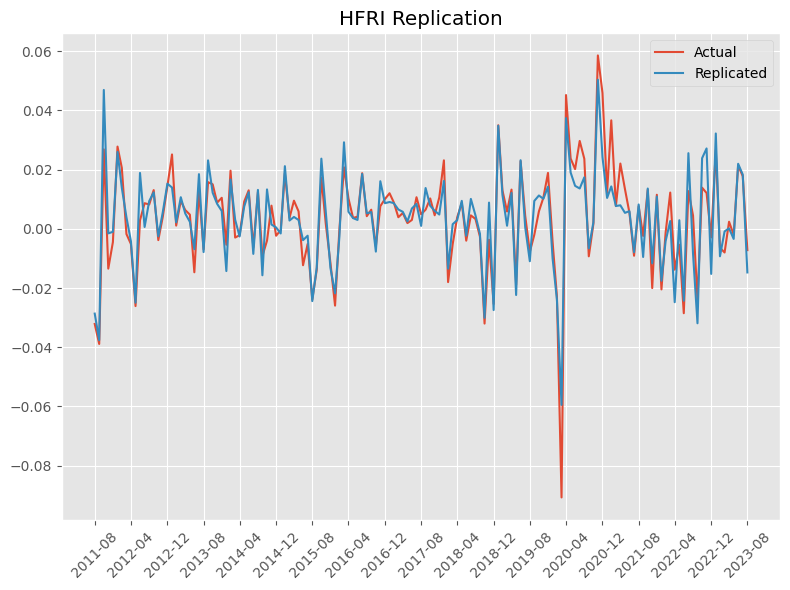

In [10]:
# Use non-negative least squares to get the weights
from sklearn.linear_model import LinearRegression

non_neg = LinearRegression(fit_intercept=True, positive=True).fit(mer_factors, hfri)

non_neg_r2 = non_neg.score(mer_factors, hfri)
print(f"NNLS R-Squared: {non_neg_r2:.2%}")

# Display the weights
weights = pd.DataFrame(
    [non_neg.intercept_[0], *non_neg.coef_[0]],
    index=["Intercept", *mer_factors.columns],
    columns=["Weight"],
)
display(weights)

# Plot the replication
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hfri.index, hfri, label="Actual")
ax.plot(hfri.index, non_neg.predict(mer_factors), label="Replicated")
ax.legend()
ax.grid(True)
ax.set_title("HFRI Replication")
ax.set_xticks(hfri.index[::8])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in hfri.index[::8]],
    rotation=45,
    horizontalalignment="center",
)
fig.tight_layout()

GLM R-Squared: 76.13%


,Weights
const,0.0011
SPY US Equity,0.0500
USGG3M Index,0.1000
EEM US Equity,0.0790
EFA US Equity,0.0726
EUO US Equity,0.0219
IWM US Equity,0.1465


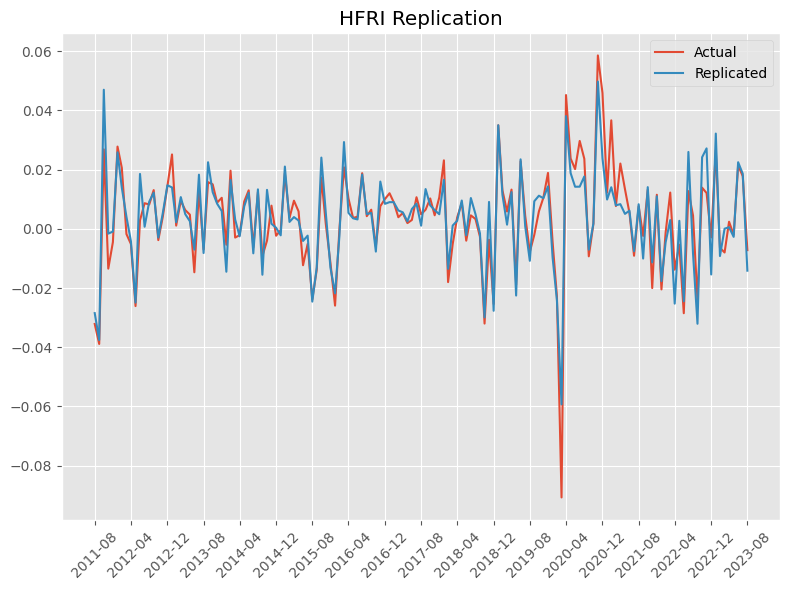

In [11]:
# Use GLM to get the weights, suppose we cap the USGG3M at 0.1 and SPY at 0.05
glm_weights = sm.GLM(
    hfri, sm.add_constant(mer_factors), family=sm.families.Gaussian()
).fit_constrained(["USGG3M Index = 0.1", "SPY US Equity = 0.05"])

# Calculate R-2

# This is from: https://stackoverflow.com/questions/26541899/why-doesnt-statsmodels-glm-have-r2-in-results
sst_val = sum(map(lambda x: np.power(x, 2), y - np.mean(y)))
sse_val = sum(map(lambda x: np.power(x, 2), glm_weights.resid_response))
r2 = 1.0 - sse_val / sst_val

print(f"GLM R-Squared: {r2:.2%}")

# Display the weights
display(pd.DataFrame(glm_weights.params, columns=["Weights"]))

# Plot the replication
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hfri.index, hfri, label="Actual")
ax.plot(
    hfri.index,
    glm_weights.predict(sm.add_constant(mer_factors)),
    label="Replicated"
)
ax.legend()
ax.grid(True)
ax.set_xticks(hfri.index[::8])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in hfri.index[::8]],
    rotation=45,
    horizontalalignment="center",
)
ax.set_title("HFRI Replication")
fig.tight_layout()

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

In [12]:
other_data = read_excel('../data/proshares_analysis_data.xlsx', sheet_name='other_data')

calc_multivariate_regression(other_data["HEFA US Equity"], mer_factors, intercept=True).T

,HEFA US Equity
Alpha,0.0129
R-Squared,0.9687
SPY US Equity Beta,0.0187
USGG3M Index Beta,0.0556
EEM US Equity Beta,-0.0722
EFA US Equity Beta,0.9444
EUO US Equity Beta,0.3235
IWM US Equity Beta,0.0250
Information Ratio,0.5712
Tracking Error,0.0019


<font color='red'>

Yes, it does look like a currency-hedged version of EFA. In particular, we have a beta of 0.94 on EFA, meaning that it tracks it quite well. Of course, it's hard to say how well the hedge performs without other data, but at least judging by this regression HEFA and EFA are closely related.

</font>

In [13]:
calc_multivariate_regression(other_data["TRVCI Index"], mer_factors, intercept=True).T

,TRVCI Index
Alpha,-0.0176
R-Squared,0.7022
SPY US Equity Beta,1.8301
USGG3M Index Beta,1.6293
EEM US Equity Beta,-0.0748
EFA US Equity Beta,-0.0695
EUO US Equity Beta,-0.0540
IWM US Equity Beta,-0.1788
Information Ratio,-0.1217
Tracking Error,0.0120


<font color='red'>

High betas on SPY and USGG3M. However, a somewhat low R-squared of 0.7. I would argue (perhaps cynically) that this does describe venture capital somewhat well; lots of leverage (high beta on USGG3M) but returns that are no different than the market.

</font>

In [14]:
# Regress rets_other['TAIL US Equity'] on SPY. However, we make an adjustment: we add a "put like" factor to SPY.

rets_spy = mer_factors[["SPY US Equity"]].copy()
rets_spy["Put Factor"] = np.maximum(0, rets_spy["SPY US Equity"])

# Run the regression without the put factor
display(calc_multivariate_regression(other_data["TAIL US Equity"], spy, intercept=True).T)

# And with
display(calc_multivariate_regression(other_data["TAIL US Equity"], rets_spy, intercept=True).T)

,TAIL US Equity
Alpha,-0.0069
R-Squared,0.5990
SPY US Equity Beta,-0.5492
Information Ratio,-0.0907
Tracking Error,0.0064


,TAIL US Equity
Alpha,-0.0737
R-Squared,0.6126
SPY US Equity Beta,-0.6873
Put Factor Beta,0.2753
Information Ratio,-0.9813
Tracking Error,0.0063


<font color='red'>

It's hard to say. The correlation to SPY is quite low, but it does have a non-trivial beta on the "put like" factor. But overall I would say no.

</font>

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

<font color='red'>

Because they have to continually re-lever in order to track the index at 3x. This means that they have a decay over time and the expected return of holding these ETF to infinity is -100%. As an example:

Day 1: SPY is at 100, and closes at 110 (10% up). The 3x ETF is at 100, and closes at 130 (30% up).
Day 2: SPY is at 110, and closes at 100 (-9.1% down). The 3x ETF is at 130, and closes at 94.51 (-27.3% down).

So, even though SPY is back to where it started, the 3x ETF is down 5.49%. This is because it has to re-lever every day, and so it is buying high and selling low. For example, during the financial crisis when there were many large movements down, we would expect these ETFs to lose a lot of value due to continually having to re-lever. This is also why they have high management fees (UPRO has 0.91% management fee, compared to 0.09% for SPY, or 0.03% for VOO).

Pro Shares also wins the dubious award of most value lost by an ETF creator: https://twitter.com/quantian1/status/1600168896459251712?s=20

</font>

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

<font color='red'>

Note that in when talking about leverage, using **monthly** returns is somewhat misleading, since these ETFs only target **daily** 3x/-3x returns, but provide no guarantees on monthly returns. However, we can still use monthly returns to get a sense of how well they track their target.

</font>

In [15]:
# Note that if we maintained perfect 3x leverage, we would expect UPRO vs. SPY to have a beta of 3 on SPY.
# In fact, Pro-Shares even claims this on their website:
# 3x Short: https://www.proshares.com/globalassets/proshares/fact-sheet/prosharesfactsheetspxu.pdf
# 3x Long: https://www.proshares.com/globalassets/proshares/fact-sheet/prosharesfactsheetupro.pdf
upro_regr = calc_univariate_regression(other_data["UPRO US Equity"], spy, intercept=True).T
upro_regr


,UPRO US Equity
Alpha,-0.0717
Beta,3.0938
Downside Beta,3.0673
R-Squared,0.9928
Treynor Ratio,0.1101
Information Ratio,-1.8647
Tracking Error,0.0032


In [16]:
# Same thing but for SPXU -- -3x leverage.
spxu_regr = calc_univariate_regression(other_data["SPXU US Equity"], spy, intercept=True).T
spxu_regr

,SPXU US Equity
Alpha,-0.0840
Beta,-2.6343
Downside Beta,-2.0232
R-Squared,0.9095
Treynor Ratio,0.1651
Information Ratio,-0.6926
Tracking Error,0.0101


<font color='red'>

It does a worse job. Perhaps this is unsurprising given the SPY has trended up, meaning that being 3x short it means that you are constantly losing money and needing to re-lever (as described above). What is particularly interesting is the Downside Beta, which is -2 compared to -2.6 for normal beta. So this indicates that the upside perhaps is asymmetric. Importantly, though, this is an unfair comparison: we are looking at monthly returns on an ETF which explicitly says it targets *daily* -3x returns, so we should expect some divergence when looking at monthly returns.

</font>

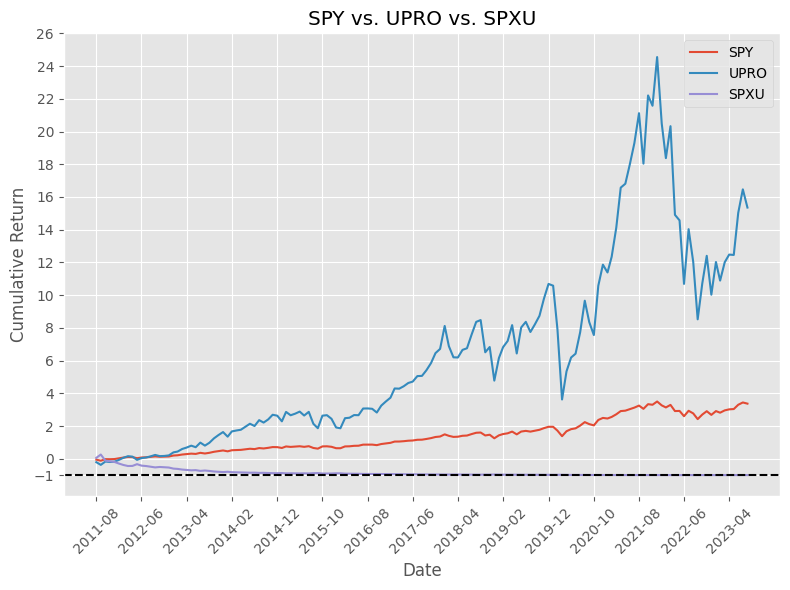

In [17]:
# Plot cumulative returns
spy_df = {
    "SPY": (1 + rets_spy["SPY US Equity"]).cumprod() - 1,
    "UPRO": (1 + other_data["UPRO US Equity"]).cumprod() - 1,
    "SPXU": (1 + other_data["SPXU US Equity"]).cumprod() - 1,
}

spy_df = pd.DataFrame(spy_df, index=rets_spy["SPY US Equity"].index)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(spy_df.index, spy_df["SPY"], label="SPY")
ax.plot(spy_df.index, spy_df["UPRO"], label="UPRO")
ax.plot(spy_df.index, spy_df["SPXU"], label="SPXU")

ax.legend()
ax.grid(True)

ax.axhline(-1, color="black", linestyle="--")

ax.set_xticks(spy_df.index[::10])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in spy_df.index[::10]],
    rotation=45,
    horizontalalignment="center",
)
ax.set_title("SPY vs. UPRO vs. SPXU")
ax.set_yticks([-1] + [i for i in range(0, 27, 2)])
ax.set_ylabel("Cumulative Return")
ax.set_xlabel("Date")
fig.tight_layout()

<font color='red'>

-3x SPY decays to -100% returns pretty quickly.

</font>

***